## Problem Statement:

In this assignment, Students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season

In [1]:
# Importing the packages
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import math
%matplotlib inline

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Importing the NBA csv file data
import pandas
with open("nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
# Checking the shape of dataset
nba.shape

(481, 31)

In [5]:
# Number of column values
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [6]:
# Checking the column statistical results
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [7]:
# Checking the info
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

## Checking for the null values

In [8]:
# Checking the null values
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [9]:
# Filling the null values with median value
nba["fg."]=nba["fg."].fillna(nba["fg."].median())
nba["x3p."]=nba["x3p."].fillna(nba["x3p."].median())
nba["x2p."]=nba["x2p."].fillna(nba["x2p."].median())
nba["efg."]=nba["efg."].fillna(nba["efg."].median())
nba["ft."]=nba["ft."].fillna(nba["ft."].median())

In [10]:
nba.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

## Analysing the independent columns

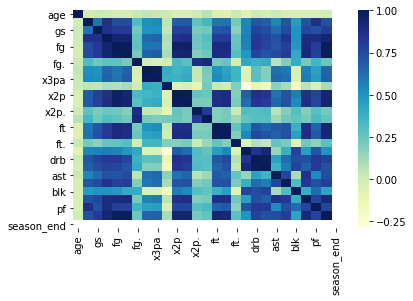

In [11]:
import seaborn as sn
sn.heatmap(nba.corr(), cmap="YlGnBu")

In [12]:
# Dealing with Categorical variables hist plot for "pos" column
nba["pos"].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [13]:
#Converting the pos column value into numeric
nba["posNum"]=nba.pos.map({'SG':0,'SF':1,'PF':2,'C':3,'PG':4,'F':4,'G':4})

In [14]:
# Creating the dummies for posNum column
pos_dummies=pd.get_dummies(nba['posNum'],prefix="pos_")


In [15]:
pos_dummies.head()

,pos__0,pos__1,pos__2,pos__3,pos__4
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [16]:
# Deleting the column as it is not required as per the one hot encoding technique
pos_dummies=pos_dummies.drop('pos__0',axis=1)

In [17]:
pos_dummies.head()

,pos__1,pos__2,pos__3,pos__4
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,0
4,0,0,1,0


In [18]:
# Converting the catergorical varible into numeric

nba["bref_team_id"].value_counts()

TOT    63
NOP    18
OKC    17
LAC    16
LAL    16
UTA    16
NYK    15
MIA    15
DET    15
DAL    15
BRK    15
POR    15
PHO    15
ATL    15
HOU    15
MIN    14
SAS    14
BOS    14
CLE    14
WAS    14
MEM    13
ORL    13
MIL    13
CHA    13
PHI    12
IND    12
DEN    12
GSW    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

In [19]:
# constructing the dummies for the bref_team_id column
teamId_dummies=pd.get_dummies(nba['bref_team_id'],prefix="teamId")
teamId_dummies.head()

,teamId_ATL,teamId_BOS,teamId_BRK,teamId_CHA,teamId_CHI,teamId_CLE,teamId_DAL,teamId_DEN,teamId_DET,teamId_GSW,...,teamId_ORL,teamId_PHI,teamId_PHO,teamId_POR,teamId_SAC,teamId_SAS,teamId_TOR,teamId_TOT,teamId_UTA,teamId_WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Deleting the column as it is not required as per the one hot encoding technique
teamId_dummies=teamId_dummies.drop('teamId_ATL',axis=1)

In [21]:
#droping the columns bref_team_Id and pos columns
nba.drop(['pos','bref_team_id'],axis=1,inplace=True)

In [22]:
nba.head()

,player,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,trb,ast,stl,blk,tov,pf,pts,season,season_end,posNum
0,Quincy Acy,23,63,0,847,66,141,0.468,4,15,...,216,28,23,26,30,122,171,2013-2014,2013,1
1,Steven Adams,20,81,20,1197,93,185,0.503,0,0,...,332,43,40,57,71,203,265,2013-2014,2013,3
2,Jeff Adrien,27,53,12,961,143,275,0.520,0,0,...,306,38,24,36,39,108,362,2013-2014,2013,2
3,Arron Afflalo,28,73,73,2552,464,1011,0.459,128,300,...,262,248,35,3,146,136,1330,2013-2014,2013,0
4,Alexis Ajinca,25,56,30,951,136,249,0.546,0,1,...,277,40,23,46,63,187,328,2013-2014,2013,3


## Calculating the Euclidean distance for one player

In [23]:
# Select Lebron James from our dataset
selected_player = nba[nba["player"] == "LeBron James"].iloc[0]

# Choose only the numeric columns (we'll use these to compute euclidean distance)
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

def euclidean_distance(row):
    inner_value = 0
    for k in distance_columns:
        inner_value += (row[k] - selected_player[k]) ** 2
    return math.sqrt(inner_value)

# Find the distance from each player in the dataset to lebron.
lebron_distance = nba.apply(euclidean_distance, axis=1)
print("the distance bewteen lebron and each player: ", lebron_distance)

the distance bewteen lebron and each player:  0      3475.792868
1      3148.394998
2      3161.567338
3      1189.554979
4      3216.773098
5      3919.277233
6       960.443178
7      3131.071083
8      2326.129199
9      2806.955657
10     2277.933945
11     4083.902213
12     2819.058890
13     2534.074598
14     1970.085795
15     3262.065464
16     2451.378405
17      485.856006
18     4096.585434
19     3246.515831
20     1539.172839
21     4162.749710
22     2969.043638
23     3259.582801
24     2023.603985
25     3815.822212
26     3326.666501
27     4149.198377
28     3754.041967
29     3835.882699
          ...     
451     716.243023
452    2996.450583
453    4135.156714
454    3023.456473
455    4138.570811
456    4258.518526
457    2206.524879
458    1347.758158
459    2136.309449
460    4260.053883
461    4261.181067
462    1922.713718
463    2364.771676
464    3033.755934
465    2625.998112
466    2495.296784
467    2232.354830
468    4244.598450
469    3525.434026
470 

In [24]:
# Deleting the unwanted columns
nba.drop(['posNum','season','season_end','player'],axis=1,inplace=True)

In [25]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [26]:
#Adding the dummies to dataset
nba=pd.concat([nba,pos_dummies,teamId_dummies],axis=1)

In [27]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,teamId_ORL,teamId_PHI,teamId_PHO,teamId_POR,teamId_SAC,teamId_SAS,teamId_TOR,teamId_TOT,teamId_UTA,teamId_WAS
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0,0,0,0,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0,0,0,0,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,1,0,0,0,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Creating the dataset with only independent columns
nba_indep=nba
nba_indep=nba_indep.drop('pts',axis=1)

## Model training, prediction and MSE calculation

In [29]:
# Independent and dependent columns
X=nba_indep
y=nba['pts']

In [30]:
# Spliting the data into train and test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
# Creating the KNN regressor object and fitting the training dataset
KNNRegressor=KNeighborsRegressor(n_neighbors=5)
KNNRegressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [32]:
# Predicting the dataset
pred=KNNRegressor.predict(X_test)

In [33]:
# Compute the mean squared error of our predictions. 
actual = y_test
mse = (((pred - actual) ** 2).sum()) / len(pred)
print(mse)

4593.665379310345


In [34]:
# Computing the MSE for different values of K.
actual = y_test
mse_total=[]
for K in range(25):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    mse = (((pred - actual) ** 2).sum()) / len(pred)
    mse_total.append(mse)
    print("mean square error is ", mse," for K-Value:",K_value)

mean square error is  8397.179310344827  for K-Value: 1
mean square error is  6304.434482758621  for K-Value: 2
mean square error is  6279.695785440613  for K-Value: 3
mean square error is  5589.809051724138  for K-Value: 4
mean square error is  4593.665379310345  for K-Value: 5
mean square error is  5060.214942528736  for K-Value: 6
mean square error is  5524.708655876143  for K-Value: 7
mean square error is  6092.5  for K-Value: 8
mean square error is  6604.34269902086  for K-Value: 9
mean square error is  6771.782896551724  for K-Value: 10
mean square error is  7217.812368196069  for K-Value: 11
mean square error is  7259.783285440613  for K-Value: 12
mean square error is  7632.5229544990825  for K-Value: 13
mean square error is  7627.732230823363  for K-Value: 14
mean square error is  7814.718590038315  for K-Value: 15
mean square error is  8238.27583512931  for K-Value: 16
mean square error is  8499.086791552321  for K-Value: 17
mean square error is  8786.674670072369  for K-Value

Text(0.5,1,'MSE vs # Neighbors')

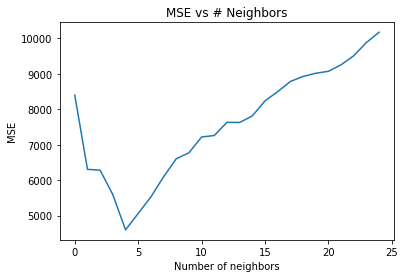

In [35]:
# Ploting the Mean square error for all K values
plt.plot(mse_total)
plt.ylabel("MSE")
plt.xlabel("Number of neighbors")
plt.title("MSE vs # Neighbors")